# Model Evaluation Metrics (confusion matrics,precision,recall,F1)

#### why metrics matter?
- imagine a model that predicts discess
- you just want to know
- how many sick people are cot(recall)
- how ofen the model gives corrects alerts(precision)
- how balance the performances is(F1 score)

- key metrics
| metric | meaning |
|--------|---------|
| Accuracy | percentage of total correct prediction |
| precision | out of predicted possitives how many correct |
| recall |out of actual possitive how many detected |
| F1 score | balance between precision and recall (good when classes are in balanced)|

- visual confision matrics 
|  | predicted possitive | predicted negavtive | 
|--|----------------------|--------------------|
| actual positive | True positive (TP) |False negative(FN) |
|actual negative | false pos(FP) | true neg (TN) |

- formulas 
1. acccuracy = (TP+TN)/total
2. precision = TP/(TP+FP)
3. recall = TP/TP+FN
4. F1 score = 2*(precision*recall)/(precision+recall)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [15]:
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df["species"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.drop("species",axis = 1)
y = df["species"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

# KNN Model

In [18]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = KNN.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9466666666666667


In [20]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


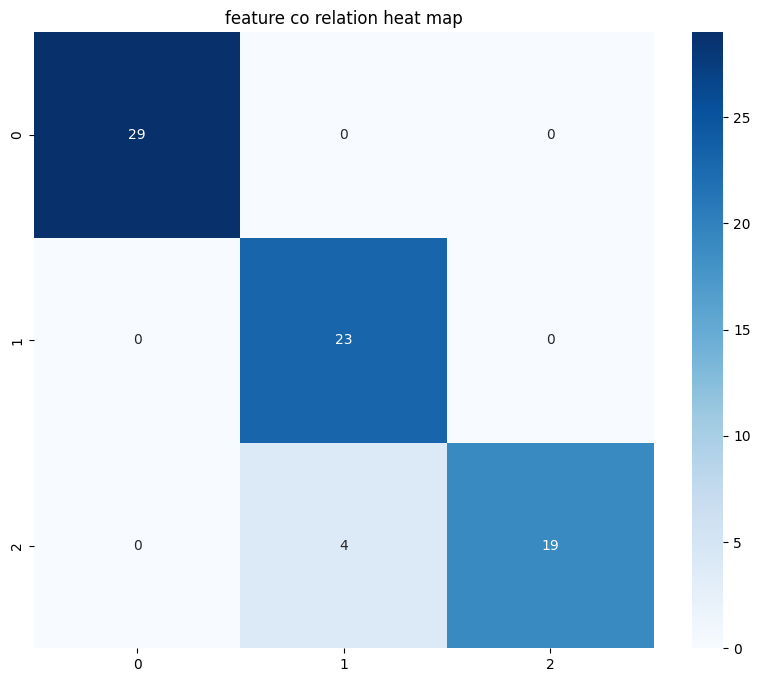

In [26]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('feature co relation heat map')
plt.show()

In [27]:
print("classification report :\n",classification_report(y_test,y_pred))

classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

